In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import warnings


import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU:", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0], True)

Num GPU: 1


# Data Preparation

## Dataset: Cat vs Dog
### Source: https://www.kaggle.com/c/dogs-vs-cats

In [36]:
# Реорганизация данных -> (тренировочная, валидационная, тестовая выборка)
os.chdir('Dataset')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    

    
#
#os.chdir('../../')

In [6]:
path = 'F:\Git_Clone\Cat_Dog_Classifications_Keras/Dataset/'

In [50]:
#get in random data
for c in random.sample(glob.glob(path+'train/cat*'), 500):
    shutil.move(c, path+'train/cat')
for c in random.sample(glob.glob(path+'train/dog*'), 500):
    shutil.move(c, path+'train/dog')
for c in random.sample(glob.glob(path+'train/cat*'), 100):
    shutil.move(c, path+'valid/cat')
for c in random.sample(glob.glob(path+'train/dog*'), 100):
    shutil.move(c, path+'valid/dog')   
for c in random.sample(glob.glob(path+'train/cat*'), 100):
    shutil.move(c, path+'test/cat')
for c in random.sample(glob.glob(path+'train/dog*'), 100):
       shutil.move(c, path+'test/dog')  

In [7]:
train_path = path + 'train'
valid_path = path + 'valid'
test_path = path + 'test'

In [9]:
train_bathes = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224,224),  batch_size = 10, classes = ['cat','dog'])
valid_bathes = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['cat','dog'], batch_size = 10)
test_bathes = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['cat','dog'], batch_size = 10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [38]:
#check prepare data
imgs, labels = next(train_bathes)

In [39]:
# функция отображения набора ПРЕДОБРАБОТАННЫХ данных
def plot_images(images_arr, bath_size = 10):
    fig, axes = plt.subplots(1,bath_size, figsize = (20,20))
    axes = axes.flatten()
    for img , ax in zip(images_arr, axes):
        #ax.imshow(img)
        ax.imshow((img * 255).astype(np.uint8)) # not work...
        
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

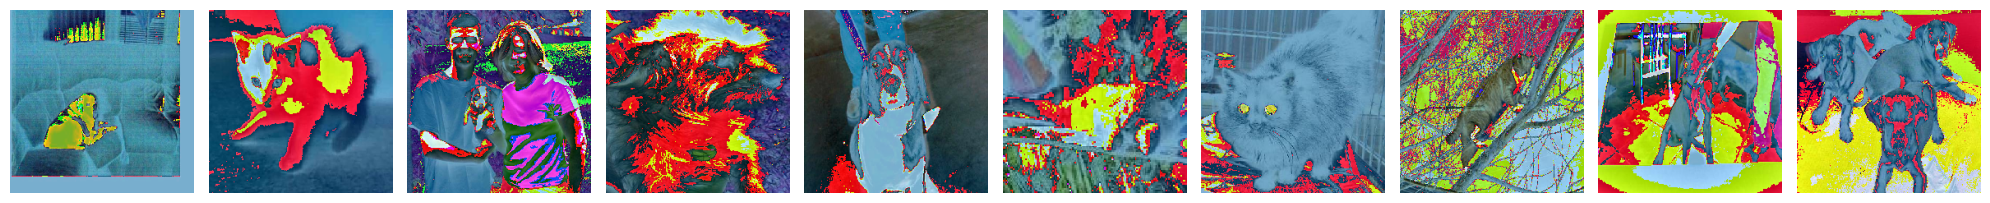

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [40]:
plot_images(imgs)
print(labels) #[1,0] - cat | [0,1] - dog